## Importación de librerías

In [1]:
#Tratamiento de datos
import pandas as pd
pd.set_option('display.max_columns', None)

#Exploración de archivos
import sys
sys.path.append('../')
#--------------

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
#--------------

#Tratamiento de nulos numéricos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
#--------------

#Funciones personalizadas
from src import sp_nulos as sn
#--------------

## Carga de archivos

In [2]:
df_o = pd.read_csv('../data/data_limpios.csv')
df_o.sample(2)

,customer_id,customer_age,gender,signup_date,prime_member,order_id,order_date,date_key,contact_name,country,city,region,subregion,state,industry,segment,product,license,sales,quantity,discount,profit,customer,order_year,order_month
50983,1087,28.0,Male,2022-04-12,False,175102,2021-12-24,20211224,Liam Burgess,United States,New York City,AMER,NAMER,Received by the customer,Manufacturing,SMB,ContactMatcher,BFQUIMLEFL,199.36,4,2,78.14912,Toyota Motor,2021,12
36752,1061,50.0,Male,2022-07-23,False,209068,2023-06-27,20230627,Emma Stewart,United Kingdom,London,EMEA,UKIR,Received by the customer,Energy,Strategic,Support,76KBFOLOQB,68.52,3,0,27.40800,Marathon Petroleum,2023,6


In [ ]:
# Copia de dataframe
df = df_o.copy()

## Gestión de nulos

In [4]:
(df.isnull().mean() * 100)[lambda x: x > 0]

customer_age    10.576346
state            6.443866
sales            1.951171
profit           1.951171
dtype: float64

## Nulos categóricos

In [ ]:
df['state'].value_counts()/df.shape[0]*100

state
Received by the customer    70.262157
Cancelled                   18.721233
Preparing order              2.301381
Dispatched to center         2.271363
Name: count, dtype: float64

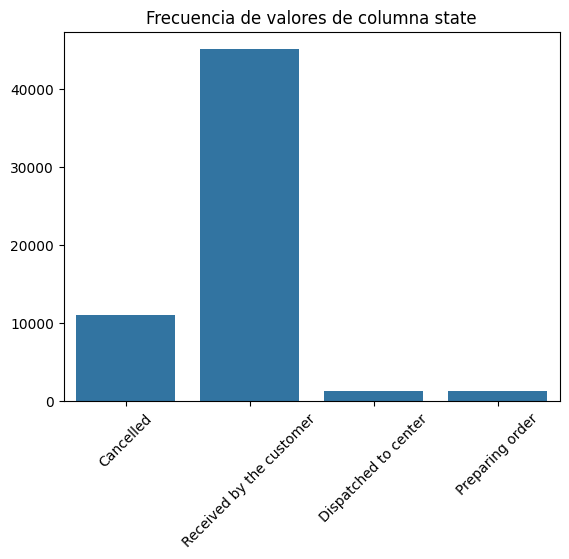

In [25]:
ax = sns.countplot(data=df, x='state')

ax.tick_params(axis='x', rotation=45)
ax.set_title("Frecuencia de valores de columna state")
ax.set(xlabel=None, ylabel=None)

plt.show()

In [ ]:
# Como el porcentaje de nulos en la columna state no es muy alto, lo reemplazamos por la moda ya que hay una categoría dominante.

df.loc[:,'state'] = df.loc[:,'state'].fillna('Received by the customer')

## Outliers numéricos

In [ ]:
def subplot_col_num (dataframe):

    """
    Genera gráfico subplot de columnas numéricas.

    Parameters:
    df (pd.DataFrame): DataFrame en el cual se procesarán las columnas categóricas.

    Returns:
    None
    """

    col_nums = dataframe.select_dtypes(include= 'number').columns
    num_graph = len(col_nums)

    num_rows = (num_graph +2 )//2

    fig, axes = plt.subplots(num_graph, 2, figsize=(15, num_rows*5))

    for i, col in enumerate(col_nums):

        sns.histplot(data=dataframe, x=col, ax=axes[i,0], bins=200)
        axes[i,0].set_title(f'Distribution of {col}')
        axes[i,0].set_xlabel(col)
        axes[i,0].set_ylabel('Frecuency')

        sns.boxplot(data=dataframe, x=col, ax = axes[i,1])
        axes[i,1].set_title(f'{col} boxplot')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])


    plt.tight_layout()
    plt.show()

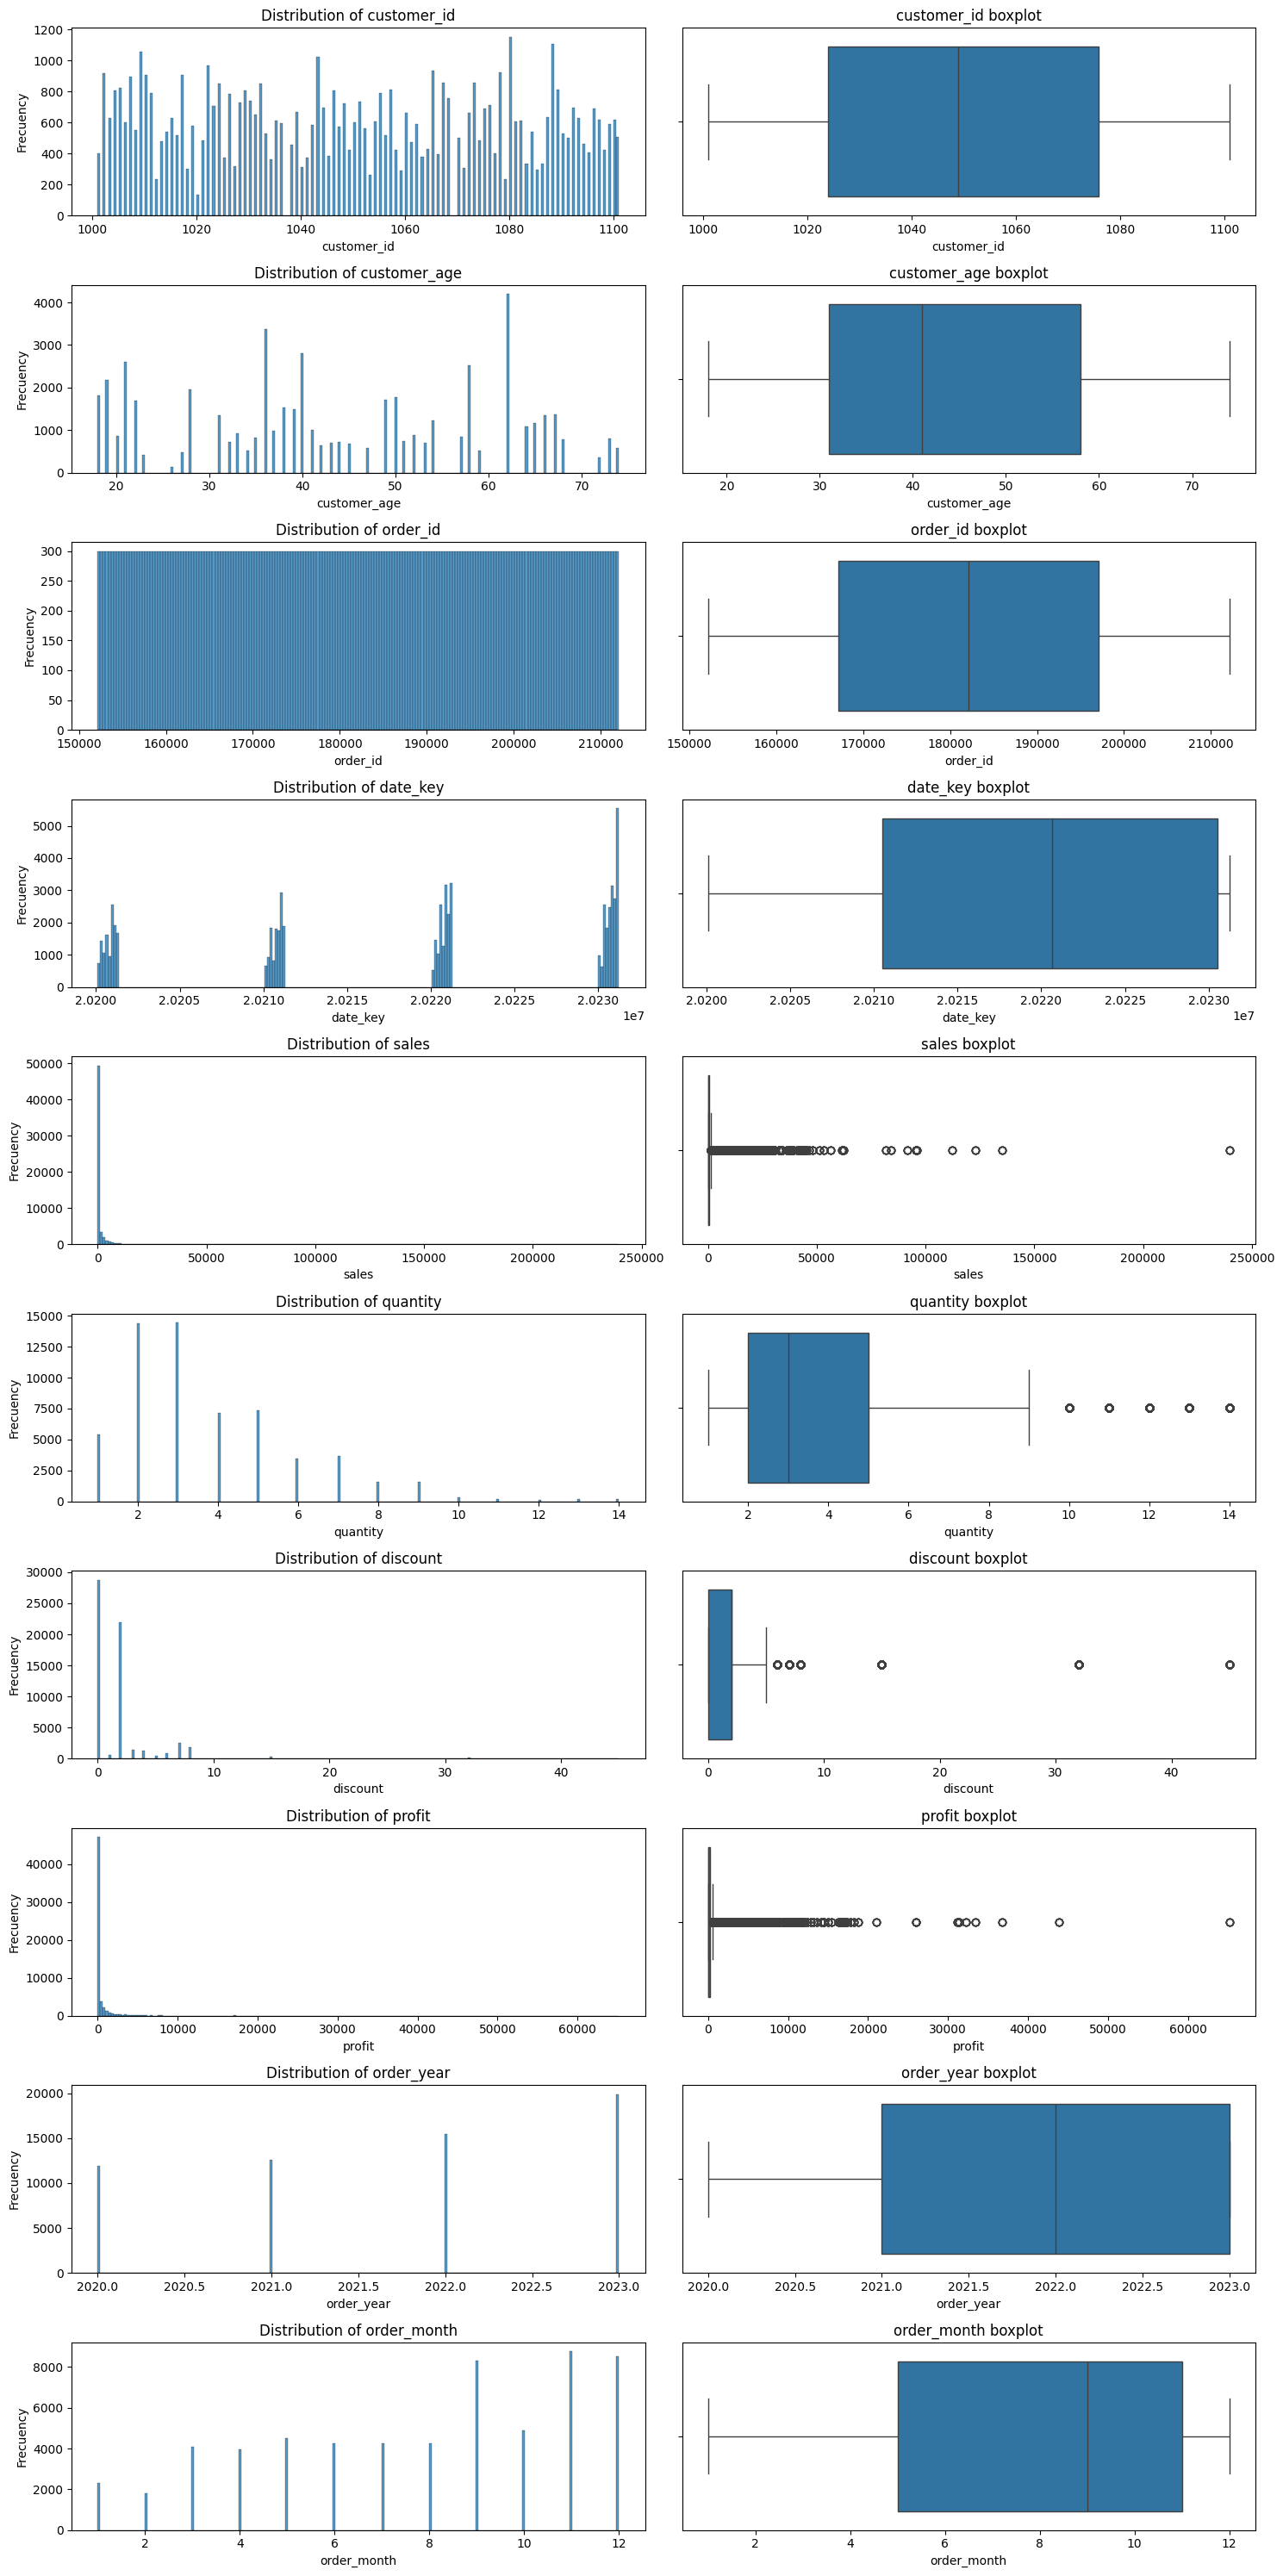

In [10]:
subplot_col_num(df)

In [11]:
(df['sales'] > 200000).sum()

np.int64(6)

In [12]:
(df['profit'] > 50000).sum()

np.int64(6)

In [13]:
df[df['profit'] > 50000]

,customer_id,customer_age,gender,signup_date,prime_member,order_id,order_date,date_key,contact_name,country,city,region,subregion,state,industry,segment,product,license,sales,quantity,discount,profit,customer,order_year,order_month
7587,1011,64.0,Female,2019-10-14,False,152555,2022-09-09,20220909,Richard Lyman,Japan,Tokyo,APJ,JAPN,Received by the customer,Finance,SMB,Marketing Suite,63SAEQQORW,239626.56,4,32,65178.42432,Bank of America Corp.,2022,9
7719,1011,64.0,Female,2019-10-14,False,162549,2022-09-09,20220909,Richard Lyman,Japan,Tokyo,APJ,JAPN,Received by the customer,Finance,SMB,Marketing Suite,63SAEQQORW,239626.56,4,32,65178.42432,Bank of America Corp.,2022,9
7851,1011,64.0,Female,2019-10-14,False,172543,2022-09-09,20220909,Richard Lyman,Japan,Tokyo,APJ,JAPN,Received by the customer,Finance,SMB,Marketing Suite,63SAEQQORW,239626.56,4,32,65178.42432,Bank of America Corp.,2022,9
7983,1011,64.0,Female,2019-10-14,False,182537,2022-09-09,20220909,Richard Lyman,Japan,Tokyo,APJ,JAPN,Received by the customer,Finance,SMB,Marketing Suite,63SAEQQORW,239626.56,4,32,65178.42432,Bank of America Corp.,2022,9
8115,1011,64.0,Female,2019-10-14,False,192531,2022-09-09,20220909,Richard Lyman,Japan,Tokyo,APJ,JAPN,Received by the customer,Finance,SMB,Marketing Suite,63SAEQQORW,239626.56,4,32,65178.42432,Bank of America Corp.,2022,9
8247,1011,64.0,Female,2019-10-14,False,202525,2022-09-09,20220909,Richard Lyman,Japan,Tokyo,APJ,JAPN,Received by the customer,Finance,SMB,Marketing Suite,63SAEQQORW,239626.56,4,32,65178.42432,Bank of America Corp.,2022,9


In [14]:
(df['quantity'] > 12).sum()

np.int64(336)

In [15]:
(df['discount'] > 30).sum()

np.int64(228)

In [ ]:
# Vemos que los outliers de sales y de profit ocurren en las mismas filas.
# Parece ser un caso particular de 6 pedidos con ventas y ganancias excesivamente altas. 
# Como estos outliers tan altos ocurren solo en este pedido del 14/10/2022 realizados por el mismo, se eliminan ya que son forman parte de una excepción.

# Los valores outliers de quantity y profit se conservan ya que son muchos más
# y eliminarlos impediría evaluar la opción eventos como de días de rebajas o compras al por mayor.


df = df.drop(df.loc[df['sales'] > 200000].index)

## Nulos numéricos

In [ ]:
(df.isnull().mean() * 100)[lambda x: x > 0]

customer_age    10.577404
sales            1.951366
profit           1.951366
dtype: float64

In [ ]:
# Se completan los nulos de customer_age con la mediana ya que el porcentaje no es muy alto.

df.loc[:,'customer_age'] = df.loc[:,'customer_age'].fillna(df['customer_age'].median())

In [ ]:
# Se comprueba que los nulos de sales son los mismos que los de profit.

df_nulos = df.loc[df.isnull().any(axis=1)]

df_nulos.sample(5)

,customer_id,customer_age,gender,signup_date,prime_member,order_id,order_date,date_key,contact_name,country,city,region,subregion,state,industry,segment,product,license,sales,quantity,discount,profit,customer,order_year,order_month
23147,1038,52.0,Male,2023-02-19,True,166157,2021-12-10,20211210,John Davies,Finland,Helsinki,EMEA,NOR,Cancelled,Healthcare,SMB,Data Smasher,L5JABNAWRI,NaN,6,0,NaN,Cigna,2021,12
54771,1092,53.0,Male,2019-11-07,False,190372,2023-05-02,20230502,Blake Fraser,Germany,Berlin,EMEA,EU-WEST,Received by the customer,Healthcare,SMB,Support,XE02DAU9YQ,NaN,2,2,NaN,UnitedHealth Group,2023,5
51091,1087,28.0,Male,2022-04-12,False,185123,2022-05-26,20220526,Frank Davidson,Finland,Helsinki,EMEA,NOR,Received by the customer,Manufacturing,Enterprise,SaaS Connector Pack,Y3TGLXFYCW,NaN,4,0,NaN,Toyota Motor,2022,5
15269,1024,62.0,Other,2022-07-08,True,181098,2020-08-08,20200808,Dominic Lawrence,Germany,Berlin,EMEA,EU-WEST,Received by the customer,Energy,SMB,Marketing Suite,7J0V41UW2W,NaN,4,2,NaN,ConocoPhillips,2020,8
2555,1004,73.0,Female,2023-07-07,False,196930,2022-05-15,20220515,Julian Nash,Germany,Berlin,EMEA,EU-WEST,Received by the customer,Tech,Strategic,SaaS Connector Pack,OWJ39HLLCD,NaN,3,2,NaN,Amazon,2022,5


In [ ]:
# Efectivamente, al no tener el valor de la venta tampoco tenemos el de la ganancia.
# Como el porcentaje es muy bajo, se eliminan esas filas.

df = df.dropna(subset=['sales'])

In [21]:
df.isnull().sum()

customer_id     0
customer_age    0
gender          0
signup_date     0
prime_member    0
order_id        0
order_date      0
date_key        0
contact_name    0
country         0
city            0
region          0
subregion       0
state           0
industry        0
segment         0
product         0
license         0
sales           0
quantity        0
discount        0
profit          0
customer        0
order_year      0
order_month     0
dtype: int64

In [ ]:
# Exportación de archivo data_limpios_nonulos.csv

df.to_csv('../data/data_limpios_nonulos.csv', index=False)